In [2]:
import kgeo as kg
import numpy as np
import matplotlib.pyplot as plt
from kgeo.off_eq import *
import kgeo.bfields as kgb
from kgeo.image import *

### Define spacetime parameters

In [ ]:
spin = .94 #BH spin
rp = 1+np.sqrt(1-a**2) #outer horizon

### Define parameters along fieldline

In [ ]:
thetahorizon = np.pi/3 #angle that fieldline intersects horizon
nr = 1000
Rmin = 1.1*rp*np.sin(thetahorizon) #min cylindrical radius
Rmax = 10 #max cylindrical radius
Rvals = np.linspace(Rmin, Rmax, nr)
pval = 1.0 #stream function is r^p(1-cos theta)
psi = psiBZpower(rp, thetahorizon, pval)
Omegaf = omega_BZpower(0, psi, spin, pval) #fieldline rotation rate - set by Znajek condition on horizon

rvals = np.array([rfromR_power(R, psi, pval) for R in Rvals]) #convert from cylindrical r to spherical R
thetavals = np.arcsin(Rvals/rvals) #polar angle theta
r0min, theta0min = kg.velocities.r0min_power(psi, Omegaf, spin, pval, 1.0) #stagnation surface coordinates

/home/zgelles/Accretion/JetModel/kgeo/kgeo/ff_boost.py:76: RuntimeWarning: divide by zero encountered in scalar divide
  return psiBZpower(np.sqrt(R**2+Z**2),np.arctan(R/Z),p)-psi0


### Compute FF drift velocity along fieldline

In [29]:
model = 'power'
bf_here = kg.bfields.Bfield(model, p=pval) 
u0, u1, u2, u3 = kg.velocities.u_driftframe(spin, rvals, bfield=bf_here, nu_parallel='FF', th=thetavals) 

/home/zgelles/Accretion/JetModel/kgeo/kgeo/velocities.py:487: RuntimeWarning: invalid value encountered in sqrt
  vpar_max = np.sqrt(1 - Esq/Bsq)


### Plot radial component

(1.0450000000000002, 6.4572167239764084)

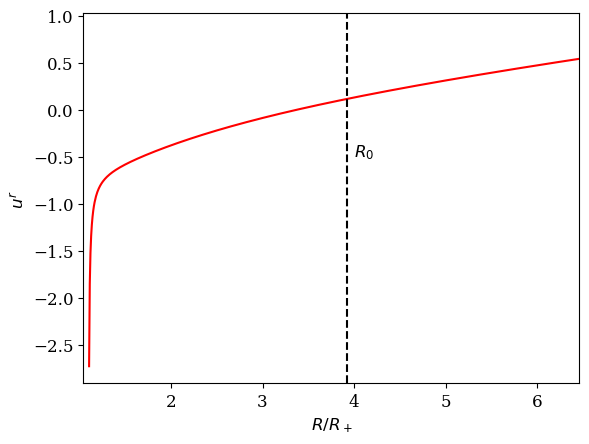

In [39]:
plt.plot(Rvals/(rp*np.sin(thetahorizon)),u1,'r-')
plt.axvline(r0min*np.sin(theta0min),color='k',linestyle='--')
plt.text(4,-.5,r'$R_0$')
plt.ylabel(r'$u^r$')
plt.xlabel(r'$R/R_+$')
plt.xlim(.95*Rvals[0]/(rp*np.sin(thetahorizon)),Rvals[-1]/rp*np.sin(thetahorizon))